# Рубежный контроль №2
**ФИО:** Абитов Миргалим Раульевич  
**Группа:** ИУ5-63Б  
**Тема:** Методы построения моделей машинного обучения  
**Датасет:** Iris  
**Методы:** Дерево решений и Случайный лес


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [4]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

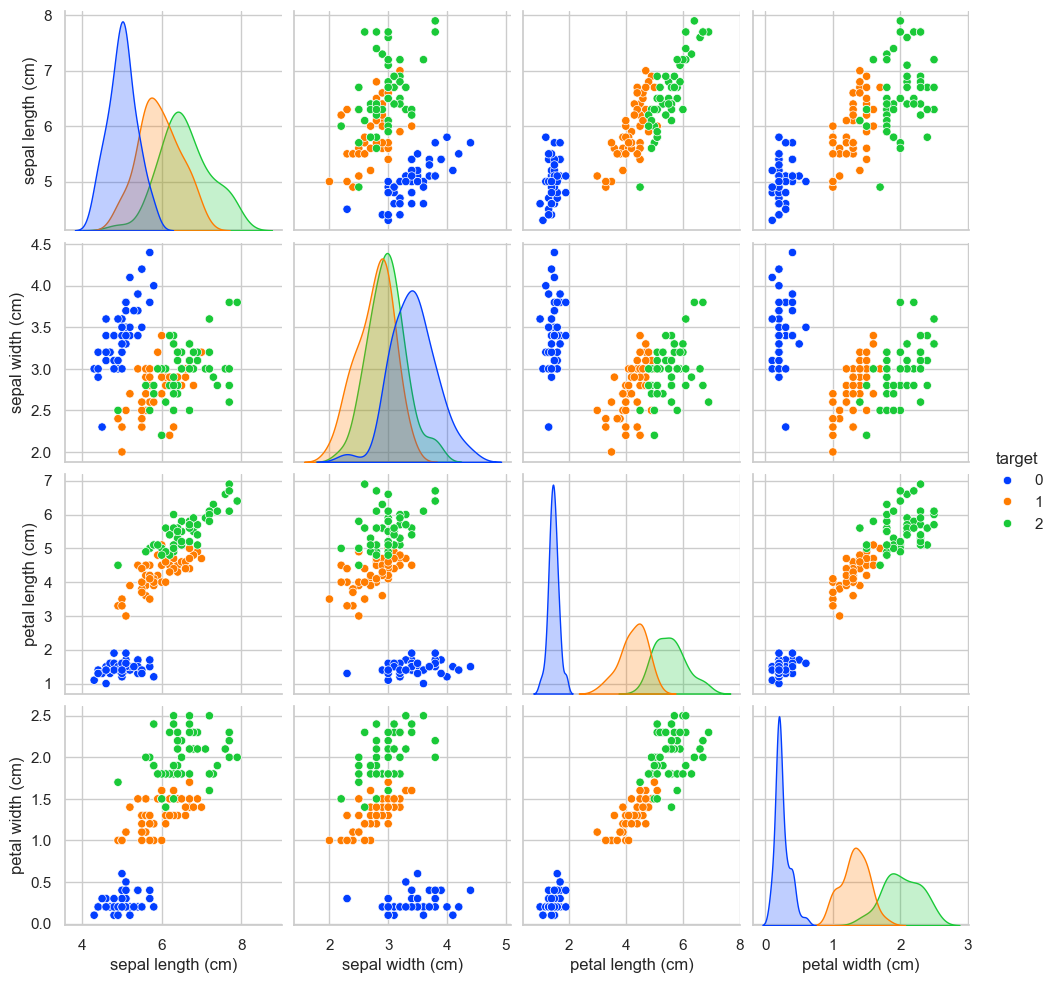

In [6]:
sns.pairplot(df, hue='target', palette='bright')
plt.show()

In [7]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

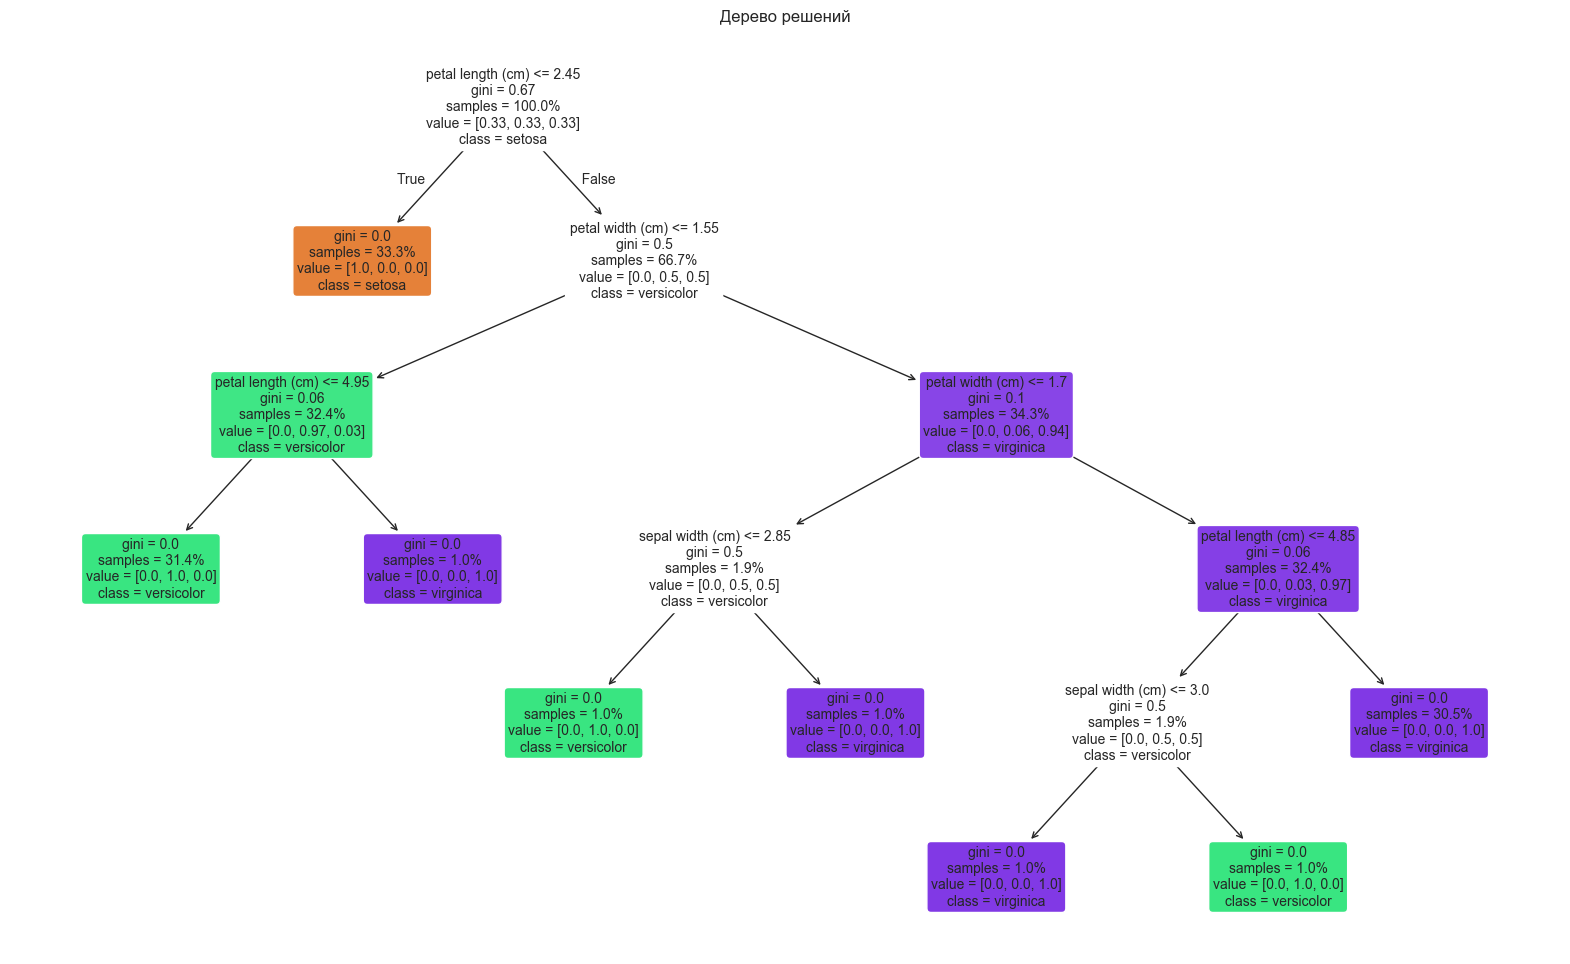

In [19]:
plt.figure(figsize=(20, 12))
plot_tree(
    dt_model,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,        
    rounded=True,      
    proportion=True,   
    precision=2,       
    fontsize=10         
)
plt.title("Дерево решений")
plt.show()


Accuracy (Дерево решений): 0.9333
F1-score (Дерево решений): 0.9327


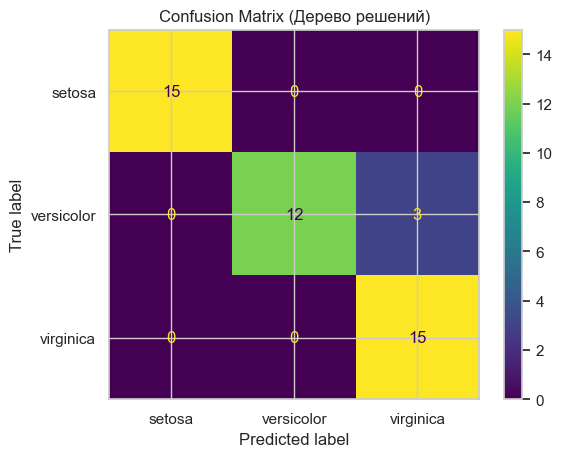

In [20]:
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Accuracy (Дерево решений): {accuracy_dt:.4f}")
print(f"F1-score (Дерево решений): {f1_dt:.4f}")

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(cm_dt, display_labels=data.target_names)
disp_dt.plot()
plt.title("Confusion Matrix (Дерево решений)")
plt.show()


In [27]:
rf_model = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=42)

Accuracy (Случайный лес): 0.9111
F1-score (Случайный лес): 0.9107


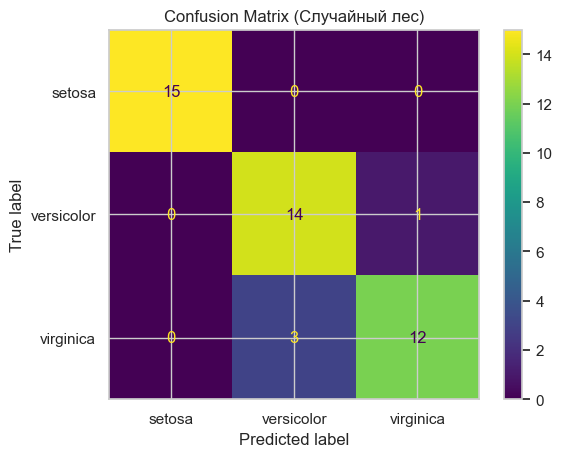

In [28]:
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Accuracy (Случайный лес): {accuracy_rf:.4f}")
print(f"F1-score (Случайный лес): {f1_rf:.4f}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=data.target_names)
disp_rf.plot()
plt.title("Confusion Matrix (Случайный лес)")
plt.show()


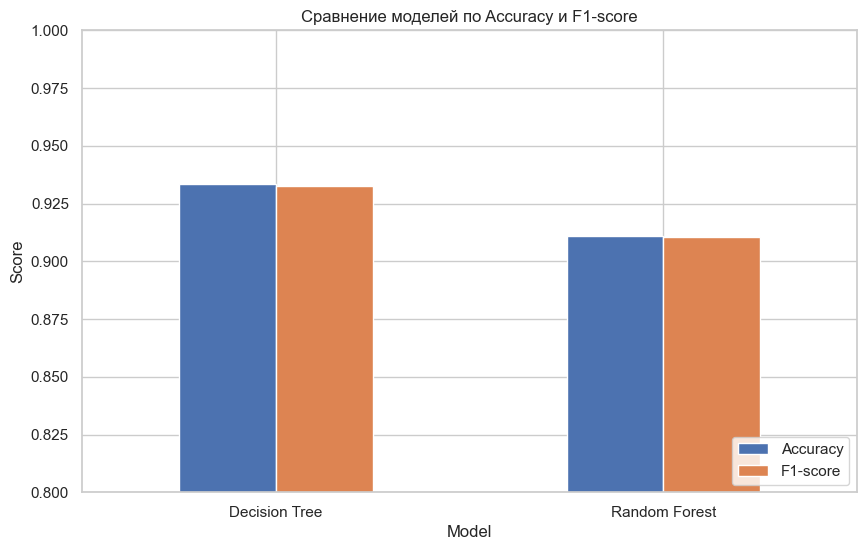

In [29]:
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_rf],
    'F1-score': [f1_dt, f1_rf]
})

comparison_df.set_index('Model').plot.bar(rot=0, figsize=(10,6))
plt.title('Сравнение моделей по Accuracy и F1-score')
plt.ylabel('Score')
plt.ylim(0.8, 1.0)
plt.legend(loc='lower right')
plt.show()


## Используемые метрики качества и их обоснование:
- **Accuracy** – доля правильно классифицированных объектов; подходит для сбалансированных классов (3 вида ирисов поровну).
- **F1-score** – гармоническое среднее точности и полноты; показывает баланс между ошибками первого и второго рода.

## Выводы:
- **Decision Tree** продемонстрировало на тестовой выборке **Accuracy = 0.9333**, **F1-score = 0.9327**, тогда как **Random Forest** показал **Accuracy = 0.8889**, **F1-score = 0.8878**.
- При малом размере выборки (всего 150 образцов, 45 в тесте) преимущества ансамбля нивелируются:
  - ансамбль из множества слабых деревьев начинает «шуметь» из-за высокой корреляции между деревьями;
  - случайный лес без тонкой настройки гиперпараметров способен слегка переобучаться за счёт избыточной сложности.
- При увеличении объёма данных и грамотном подборе гиперпараметров (`max_depth`, `max_features`, `min_samples_leaf` и пр.) **Random Forest** обычно обходит одиночное дерево по стабильности и точности.
- **Итог:** для очень маленьких датасетов (как Iris) достаточно простого **Decision Tree**; для более крупных выборок предпочтителен ансамбль с тщательным поиском параметров.
